# Final models comparison and summary

### Dependencies loading

In [351]:
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor, DMatrix
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboostlss.model import XGBoostLSS
from xgboostlss.distributions.Gaussian import Gaussian
import pickle
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 150)

# np.random.seed(1916) #uncomment if you want your code to be reproducible; for the purposes of our activity, let's add some randomness to the results

### Final models comparison

Now we have to use our 6 models to score our test set!

#### Naive Model

In case of Naive Model we have already scored our test set!

In [352]:
naive_model_score = pd.read_csv("../data/models_output/naive.csv", index_col = 0)

In [353]:
naive_model_score.rename(index={0: 'naive_model'},inplace=True)

In [354]:
naive_model_score

,RMSE,MAE
naive_model,0.16786,0.091059


#### OLS

In [355]:
df_train = pd.read_csv("../data/output/train_fe.csv", index_col=0)
df_test = pd.read_csv("../data/output/test_fe.csv", index_col=0)

In [356]:
X = ['adv_cat_(874.5, inf]', 'diff_positive', 'str_cat_(0.0875, 0.192]', 'ta_log', 'WB_GDPpc', 'txt_cat_(0.488, 24.415]', 'txt_cat_(-34.811, 0.488]', 'gielda_2', 'ppe_clip', 'revenue_cat_(1248.817, 4233.587]', 'revenue_cat_(4233.587, inf]', 'pi_cat_(8108.5, inf]', 'revenue_cat_(0.174, 1248.817]', 'roa_clip', 'pi_cat_(-8975.0, -1.523]', 'pi_cat_(157.119, 465.9]', 'pi_cat_(465.9, 7875.5]', 'pi_cat_(-1.523, 157.119]']

In [357]:
model = pickle.load(open("../models/ols.sav", 'rb'))

In [358]:
y_pred = model.predict(df_test.loc[:,X].values)

In [359]:
y_true = df_test.etr.tolist()
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
ols_model_score = pd.DataFrame([rmse, mae]).T.rename(columns ={0:"RMSE", 1:"MAE"})

<Figure size 1000x500 with 0 Axes>

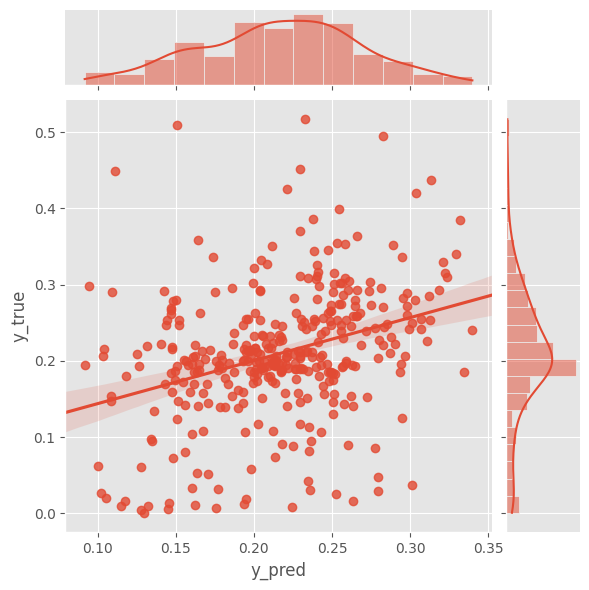

In [360]:
comp = pd.DataFrame([y_pred, y_true]).rename({0:"y_pred", 1:"y_true"}).T
plt.figure(figsize=(10, 5))
sns.jointplot(x=comp.y_pred, y=comp.y_true, kind="reg", truncate=False,)

In [361]:
ols_model_score.rename(index={0: 'ols_model'},inplace=True)

In [362]:
ols_model_score

,RMSE,MAE
ols_model,0.085129,0.061867


#### ARMA

In case of ARMA we have already scored our test set!

In [363]:
arma_model_score = pd.read_csv("../data/models_output/arma.csv", index_col = 0)

In [364]:
arma_model_score.rename(index={0: 'arma_model'},inplace=True)

In [365]:
arma_model_score

,RMSE,MAE
arma_model,0.115057,0.073336


#### ARDL

In [366]:
df_train = pd.read_csv("../data/output/train_fe.csv", index_col=0)
df_test = pd.read_csv("../data/output/test_fe.csv", index_col=0)

In [367]:
X = ['sale', 'cfc', 'txt_cat_(-34.811, 0.488]', 'txt_cat_(0.488, 24.415]',
       'txt_cat_(308.55, 327.531]', 'pi_cat_(7875.5, 8108.5]',
       'str_cat_(0.28, inf]', 'dlc_cat_(176.129, 200.9]', 'diff_positive',
       'etr_y_ma']

In [368]:
model = pickle.load(open("../models/ardl.sav", 'rb'))

In [369]:
y_pred = model.predict(df_test.loc[:,X].values)

In [370]:
y_true = df_test.etr.tolist()
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
ardl_model_score = pd.DataFrame([rmse, mae]).T.rename(columns ={0:"RMSE", 1:"MAE"})

<Figure size 1000x500 with 0 Axes>

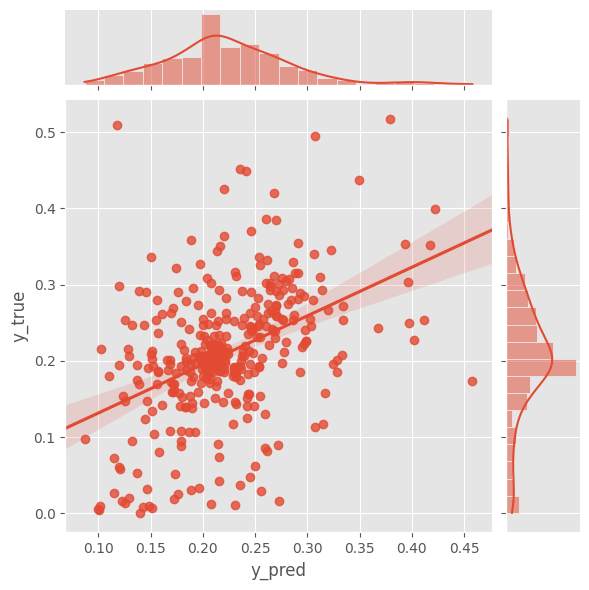

In [371]:
comp = pd.DataFrame([y_pred, y_true]).rename({0:"y_pred", 1:"y_true"}).T
plt.figure(figsize=(10, 5))
sns.jointplot(x=comp.y_pred, y=comp.y_true, kind="reg", truncate=False,)

In [372]:
ardl_model_score.rename(index={0: 'ardl_model'},inplace=True)

In [373]:
ardl_model_score

,RMSE,MAE
ardl_model,0.082121,0.05862


#### KNN

In [374]:
df_train = pd.read_csv("../data/output/train_fe.csv", index_col=0)
df_test = pd.read_csv("../data/output/test_fe.csv", index_col=0)

In [375]:
X = ['ta', 'txt', 'pi', 'str', 'xrd', 'ni', 'ppent', 'intant', 'dlc', 'dltt', 'capex', 'revenue', 'cce', 'adv', 'diff', 'roa', 'lev', 'intan', 'rd', 'ppe', 'sale', 'cash_holdings', 'adv_expenditure', 'capex2', 'cfc', 'dta', 'y_v2x_polyarchy', 'WB_GDPgrowth', 'WB_GDPpc', 'WB_Inflation', 'rr_per_country', 'rr_per_sector', 'etr_y_past', 'etr_y_ma', 'diff_ma', 'roa_ma', 'lev_ma', 'intan_ma', 'ppe_ma', 'sale_ma', 'cash_holdings_ma', 'roa_past', 'lev_past', 'intan_past', 'ppe_past', 'sale_past', 'cash_holdings_past']
standardization = ['rok', 'ta', 'txt', 'pi', 'str', 'xrd', 'ni', 'ppent', 'intant', 'dlc', 'dltt', 'capex', 'revenue', 'cce', 'adv', 'diff', 'roa', 'lev', 'intan', 'rd', 'ppe', 'sale', 'cash_holdings', 'adv_expenditure', 'capex2', 'capex2_scaled', 'y_v2x_polyarchy', 'WB_GDPgrowth', 'WB_GDPpc', 'WB_Inflation', 'rr_per_country', 'rr_per_sector', 'ta_log', 'ppent_sqrt', 'intant_sqrt', 'roa_clip', 'lev_sqrt', 'intan_pow2', 'rd_sqrt', 'ppe_clip', 'cash_holdings_sqrt', 'diff_dta', 'etr_y_past', 'etr_y_ma', 'diff_ma', 'roa_ma', 'lev_ma', 'intan_ma', 'ppe_ma', 'sale_ma', 'cash_holdings_ma', 'roa_past', 'lev_past', 'intan_past', 'ppe_past', 'sale_past', 'cash_holdings_past', 'y_e_p_polity']

In [376]:
scaler = pickle.load(open("../models/minmaxscaler.sav", 'rb'))
df_test[standardization] = scaler.transform(df_test[standardization])

In [377]:
model = pickle.load(open("../models/knn.sav", 'rb'))

In [378]:
y_pred = model.predict(df_test.loc[:,X].values)
y_pred

array([0.15381768, 0.14548521, 0.36528674, 0.16766692, 0.18747688,
       0.20035358, 0.19752034, 0.20237613, 0.39314654, 0.19300135,
       0.33345822, 0.3296713 , 0.28701783, 0.09736033, 0.26823414,
       0.28654306, 0.3241411 , 0.30037981, 0.29695114, 0.47406234,
       0.07206431, 0.17674928, 0.09264793, 0.12225917, 0.18816236,
       0.20352299, 0.10736068, 0.12256565, 0.17945494, 0.34148471,
       0.18061057, 0.33542907, 0.09570639, 0.15555886, 0.2491224 ,
       0.3027646 , 0.49428015, 0.19197748, 0.232559  , 0.18817675,
       0.28471094, 0.21752146, 0.19842386, 0.17789764, 0.17756358,
       0.29387459, 0.34024142, 0.10459147, 0.20729895, 0.33207707,
       0.3157007 , 0.28489943, 0.27884077, 0.25935849, 0.39578361,
       0.23638513, 0.18821065, 0.19634532, 0.16314053, 0.20292084,
       0.16481602, 0.22349722, 0.16935729, 0.3275025 , 0.16886608,
       0.23720305, 0.18902764, 0.15396119, 0.11922853, 0.11875531,
       0.18391152, 0.30255954, 0.23092748, 0.20505301, 0.47802

In [379]:
y_true = df_test.etr.tolist()
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
knn_model_score = pd.DataFrame([rmse, mae]).T.rename(columns ={0:"RMSE", 1:"MAE"})

<Figure size 1000x500 with 0 Axes>

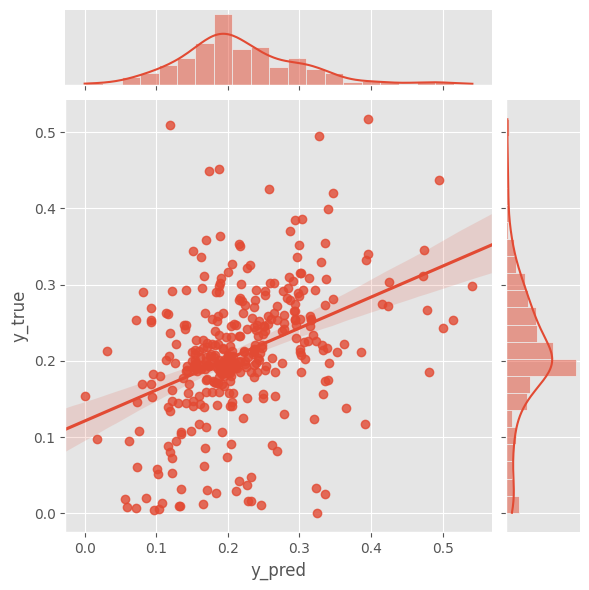

In [380]:
comp = pd.DataFrame([y_pred, y_true]).rename({0:"y_pred", 1:"y_true"}).T
plt.figure(figsize=(10, 5))
sns.jointplot(x=comp.y_pred, y=comp.y_true, kind="reg", truncate=False,)

In [381]:
knn_model_score.rename(index={0: 'knn_model'},inplace=True)

In [382]:
knn_model_score

,RMSE,MAE
knn_model,0.094528,0.06713


#### SVR

In [383]:
df_train = pd.read_csv("../data/output/train_fe.csv", index_col=0)
df_test = pd.read_csv("../data/output/test_fe.csv", index_col=0)

In [384]:
X = ['ta', 'pi', 'str', 'xrd', 'dlc', 'capex', 'revenue', 'cce', 'diff', 'sale', 'cash_holdings', 'capex2', 'cfc', 'capex2_scaled', 'WB_GDPpc', 'rr_per_country', 'rr_per_sector', 'sektor_consumer discretionary', 'sektor_consumer staples', 'sektor_energy', 'sektor_health care', 'sektor_industrials', 'sektor_materials', 'sektor_real estate', 'gielda_2', 'gielda_3', 'xrd_exists', 'ni_profit', 'ni_profit_20000', 'diff_positive', 'lev_sqrt', 'etr_y_ma', 'lev_ma', 'lev_past', 'sale_past', 'cash_holdings_past']
standardization = ['rok', 'ta', 'txt', 'pi', 'str', 'xrd', 'ni', 'ppent', 'intant', 'dlc', 'dltt', 'capex', 'revenue', 'cce', 'adv', 'diff', 'roa', 'lev', 'intan', 'rd', 'ppe', 'sale', 'cash_holdings', 'adv_expenditure', 'capex2', 'capex2_scaled', 'y_v2x_polyarchy', 'WB_GDPgrowth', 'WB_GDPpc', 'WB_Inflation', 'rr_per_country', 'rr_per_sector', 'ta_log', 'ppent_sqrt', 'intant_sqrt', 'roa_clip', 'lev_sqrt', 'intan_pow2', 'rd_sqrt', 'ppe_clip', 'cash_holdings_sqrt', 'diff_dta', 'etr_y_past', 'etr_y_ma', 'diff_ma', 'roa_ma', 'lev_ma', 'intan_ma', 'ppe_ma', 'sale_ma', 'cash_holdings_ma', 'roa_past', 'lev_past', 'intan_past', 'ppe_past', 'sale_past', 'cash_holdings_past', 'y_e_p_polity']

In [385]:
scaler = pickle.load(open("../models/standardscaler.sav", 'rb'))
df_test[standardization] = scaler.transform(df_test[standardization])

In [386]:
model = pickle.load(open("../models/svr.sav", 'rb'))

In [387]:
y_pred = model.predict(df_test.loc[:,X].values)
y_pred

array([0.17668105, 0.1099839 , 0.19304401, 0.18393249, 0.19956444,
       0.19588916, 0.23362412, 0.18286352, 0.2050993 , 0.19317103,
       0.19680466, 0.27142436, 0.25481426, 0.08991978, 0.23206738,
       0.21523407, 0.12471224, 0.1818117 , 0.25002289, 0.27866626,
       0.12881545, 0.17518477, 0.14087601, 0.12158173, 0.15920239,
       0.15542808, 0.09699669, 0.14030866, 0.14925602, 0.19346497,
       0.14779996, 0.13267745, 0.21127354, 0.23372432, 0.18853288,
       0.24154894, 0.28958016, 0.15617395, 0.23073439, 0.22204603,
       0.24825327, 0.19117821, 0.20221433, 0.17860313, 0.14787615,
       0.18415523, 0.19759424, 0.1126661 , 0.22524472, 0.21071615,
       0.24480682, 0.27060168, 0.23109595, 0.23829986, 0.20059204,
       0.2212357 , 0.13525849, 0.18045631, 0.18470494, 0.19476799,
       0.18412958, 0.15269507, 0.16928199, 0.20976837, 0.23642029,
       0.21593193, 0.15305128, 0.1775398 , 0.10214891, 0.10630933,
       0.18459002, 0.26944224, 0.20505515, 0.20107556, 0.22876

In [388]:
y_true = df_test.etr.tolist()
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
svr_model_score = pd.DataFrame([rmse, mae]).T.rename(columns ={0:"RMSE", 1:"MAE"})

In [389]:
comp

,y_pred,y_true
0,0.153818,0.214678
1,0.145485,0.169561
2,0.365287,0.138719
3,0.167667,0.262670
4,0.187477,0.451843
...,...,...
358,0.221747,0.262860
359,0.101142,0.057970
360,0.346505,0.420331
361,0.183279,0.290330


<Figure size 1000x500 with 0 Axes>

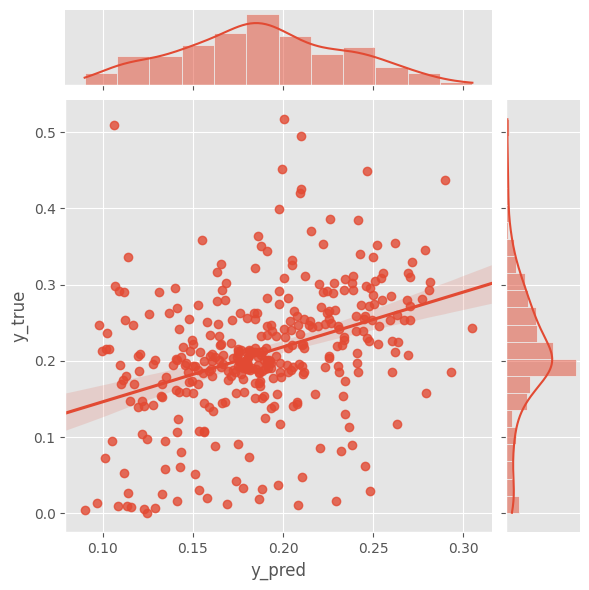

In [390]:
comp = pd.DataFrame([y_pred, y_true]).rename({0:"y_pred", 1:"y_true"}).T
plt.figure(figsize=(10, 5))
sns.jointplot(x=comp.y_pred, y=comp.y_true, kind="reg", truncate=False,)

In [391]:
svr_model_score.rename(index={0: 'svr_model'},inplace=True)

In [392]:
svr_model_score

,RMSE,MAE
svr_model,0.084485,0.061772


In [393]:
MODEL_DIR = Path("../models")
TARGET = 'etr'

def clean_feature_name(name: str) -> str:
    if not isinstance(name, str):
        return name
    translation_table = str.maketrans({"[":"", "]":"", "(":"", ")":"", " ":"", ",":""})
    return name.translate(translation_table)

boost_test = pd.read_csv("../data/output/test_fe.csv", index_col=0).rename(columns=clean_feature_name)
boost_features = boost_test.drop(columns=[TARGET]).copy()
boost_feature_matrix = boost_features.select_dtypes(include=['number', 'bool']).copy()
dropped_cols = sorted(set(boost_features.columns) - set(boost_feature_matrix.columns))
if dropped_cols:
    print(f"Dropped non-numeric columns for boosting models: {dropped_cols}")
y_test_boost = boost_test[TARGET].copy()

Dropped non-numeric columns for boosting models: ['Nazwa2', 'Ticker']


In [394]:
gradient_model_specs = [
    {
        'key': 'adaboost_gradient',
        'display': 'AdaBoost (GB)',
        'path': MODEL_DIR / 'adaboost_gradient_model.sav',
    },
    {
        'key': 'gbm_gradient',
        'display': 'GradientBoosting',
        'path': MODEL_DIR / 'gbm_gradient_model.sav',
    },
    {
        'key': 'histgbm_gradient',
        'display': 'HistGradientBoosting',
        'path': MODEL_DIR / 'histgbm_gradient_model.sav',
    },
    {
        'key': 'xgboost_gradient',
        'display': 'XGBoost',
        'path': MODEL_DIR / 'xgboost_gradient_model.sav',
    },
    {
        'key': 'lightgbm_gradient',
        'display': 'LightGBM',
        'path': MODEL_DIR / 'lightgbm_gradient_model.sav',
    },
    {
        'key': 'catboost_gradient',
        'display': 'CatBoost',
        'path': MODEL_DIR / 'catboost_gradient_model.sav',
    },
    {
        'key': 'xgboostlss_gradient',
        'display': 'XGBoostLSS',
        'path': MODEL_DIR / 'xgboostlss_gradient_model.sav',
    },
 ]

def load_gradient_estimator(spec):
    with open(spec['path'], 'rb') as f:
        return pickle.load(f)

def resolve_feature_names(estimator):
    for attr in ('feature_names_in_', 'feature_name_', 'feature_names_', 'feature_names'):
        if hasattr(estimator, attr):
            names = getattr(estimator, attr)
            if names is not None:
                return list(names)
    booster = getattr(estimator, 'booster', None)
    if booster is not None and getattr(booster, 'feature_names', None):
        return list(booster.feature_names)
    return list(boost_feature_matrix.columns)

gradient_results = []
gradient_feature_usage = {}
for spec in gradient_model_specs:
    estimator = load_gradient_estimator(spec)
    feature_names = resolve_feature_names(estimator)
    X_subset = boost_feature_matrix[feature_names]
    if isinstance(estimator, XGBoostLSS):
        dtest = DMatrix(X_subset, feature_names=feature_names)
        preds = estimator.predict(dtest, pred_type='parameters')['loc'].values
    else:
        preds = estimator.predict(X_subset)
    rmse = float(np.sqrt(mean_squared_error(y_test_boost, preds)))
    mae = float(mean_absolute_error(y_test_boost, preds))
    gradient_feature_usage[spec['key']] = feature_names
    gradient_results.append({
        'model': spec['key'],
        'display': spec['display'],
        'RMSE': rmse,
        'MAE': mae,
    })
gradient_scores_raw = (
    pd.DataFrame(gradient_results)
    .set_index('model')[['RMSE', 'MAE']]
 )
gradient_index_map = {spec['key']: spec['display'] for spec in gradient_model_specs}
gradient_scores_df = gradient_scores_raw.rename(index=gradient_index_map)
gradient_scores_df

,RMSE,MAE
model,,
AdaBoost (GB),0.091576,0.066001
GradientBoosting,0.079961,0.054205
HistGradientBoosting,0.079462,0.054048
XGBoost,0.079501,0.053989
LightGBM,0.080704,0.055303
CatBoost,0.077766,0.052639
XGBoostLSS,0.082065,0.056052


### Final comparison and summary

In [395]:
final_comparison = pd.concat([
    naive_model_score,
    ols_model_score,
    arma_model_score,
    ardl_model_score,
    knn_model_score,
    svr_model_score,
    gradient_scores_raw,
])

In [396]:
final_comparison.sort_values("RMSE")

,RMSE,MAE
catboost_gradient,0.077766,0.052639
histgbm_gradient,0.079462,0.054048
xgboost_gradient,0.079501,0.053989
gbm_gradient,0.079961,0.054205
lightgbm_gradient,0.080704,0.055303
xgboostlss_gradient,0.082065,0.056052
ardl_model,0.082121,0.058620
svr_model,0.084485,0.061772
ols_model,0.085129,0.061867
adaboost_gradient,0.091576,0.066001


In [397]:
final_comparison.rename({
    "knn_model": "KNN",
    "svr_model": "SVR",
    "ardl_model": "ARDL",
    "ols_model": "OLS",
    "arma_model": "ARMA",
    "naive_model": "NAIVE MODEL",
    "adaboost_gradient": "AdaBoost (GB)",
    "gbm_gradient": "GradientBoosting",
    "histgbm_gradient": "HistGradientBoosting",
    "xgboost_gradient": "XGBoost",
    "lightgbm_gradient": "LightGBM",
    "catboost_gradient": "CatBoost",
    "xgboostlss_gradient": "XGBoostLSS",
}, inplace=True)

In [398]:
final_comparison.sort_values("RMSE")

,RMSE,MAE
CatBoost,0.077766,0.052639
HistGradientBoosting,0.079462,0.054048
XGBoost,0.079501,0.053989
GradientBoosting,0.079961,0.054205
LightGBM,0.080704,0.055303
XGBoostLSS,0.082065,0.056052
ARDL,0.082121,0.058620
SVR,0.084485,0.061772
OLS,0.085129,0.061867
AdaBoost (GB),0.091576,0.066001


[]

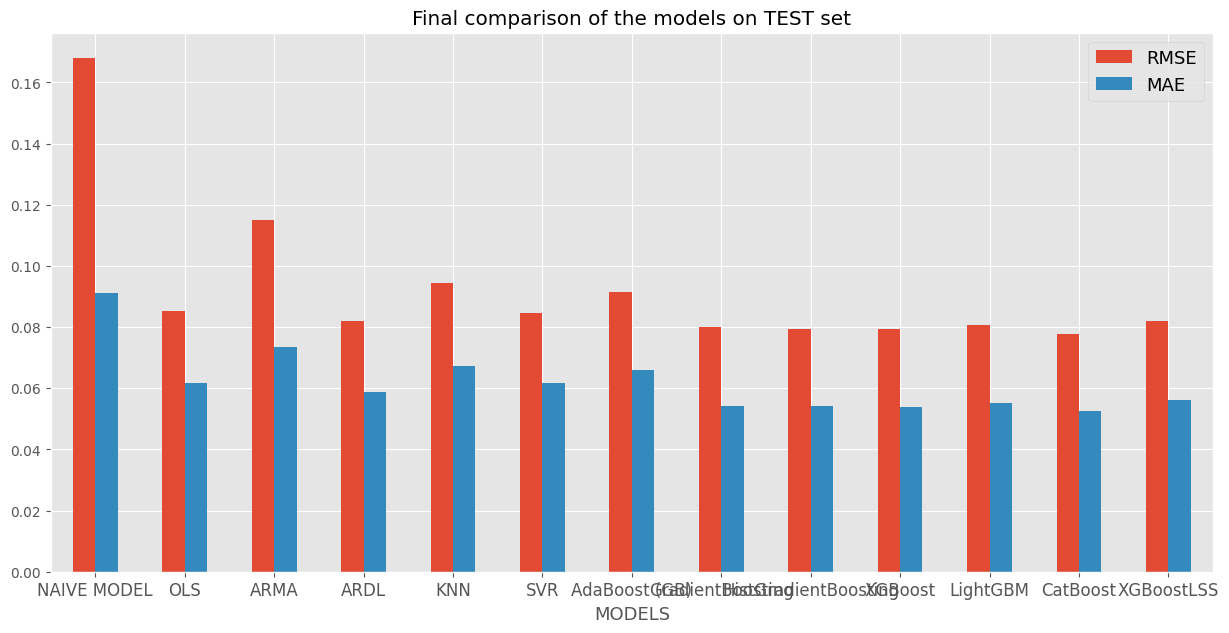

In [399]:
plt.style.use('ggplot')
ax = final_comparison.plot(kind='bar', figsize=(15, 7), title="Final comparison of the models on TEST set")
ax.legend(fontsize=13)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True, ) # labels along the bottom edge are off
ax.set_xticklabels(final_comparison.index, rotation=0, fontsize=12)
ax.set_xlabel("MODELS", fontsize=13)
ax.plot()

And the winner is: **ARDL**, but we see that OLS and SVR were very close.

#### Final summary

Based on final scores we see that: 
 * naive model ($y_t = y_{t-1}$) have been  beaten by all models
 * ARMA approach without additional exogenous variables was better than naive model
 * OLS approach without additional time-related exogenous variables was better than naive model
 * when we combined both approaches: static exogenous variables + time-related exogenous variables in ARDL model we obtained better model!
 * SVR and KNN are weaker than econometric approaches

**To be honest in most cases in the business environment for sure we will chose ARDL: cheaper - computational time; fully explainable and has less variables!**